<a href="https://colab.research.google.com/github/sheheryarsalman/2048/blob/master/Offpeak%20Filter%20peculiarities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Observations from the Chart:

The charts show that for both genders, the CORE product group has the highest attendance numbers, with off-peak attendance being significant for both, but particularly for females.

Off-peak attendance across most product groups is more prominent for females, which suggests a preference for visiting the gym during less crowded hours.

Male attendance during peak times is notably higher across most product groups, possibly indicating a tendency to visit the gym during more traditional hours.

For the OFF-PEAK product group, as expected, attendance is during off-peak times only.

The PLUS product group shows significant female attendance during off-peak times compared to males, suggesting that the added benefits of the PLUS membership are particularly valued by females during these times.

Student membership shows very low attendance, which may need further investigation to understand why—whether it's due to fewer

student members or less frequent visits.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols

from google.colab import drive
drive.mount('/content/drive/')
base_path1 = '/content/drive/My Drive/Team 5 LSEDA Employer Project/Jupyter Notebooks code/Raw data/'
base_path2 = '/content/drive/My Drive/Team 5 LSEDA Employer Project/Jupyter Notebooks code/Cleaned data/'

visits_all = pd.read_csv(base_path2 + 'visit_all_cleanedv1.csv')

Mounted at /content/drive/


<ipython-input-1-3c59a0b63d02>:15: DtypeWarning: Columns (24,25,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  visits_all = pd.read_csv(base_path2 + 'visit_all_cleanedv1.csv')


attendance_type  FEMALE offpeak  FEMALE peak  MALE offpeak  MALE peak  \
product_group                                                           
CORE                      62264        64076        121809     113646   
CORPORATE                   485          779          1421       1723   
MULTI GYM                  5285         4722         16450      13765   
OFF PEAK                  11975         7514         23103      15076   
PLUS                      31007        29517         76794      69520   
STUDENT                    1914         2083          2900       2863   

attendance_type  UNKNOWN offpeak  UNKNOWN peak  
product_group                                   
CORE                         405           628  
CORPORATE                     16            28  
MULTI GYM                      0             0  
OFF PEAK                     109            25  
PLUS                         397           332  
STUDENT                      202           350  


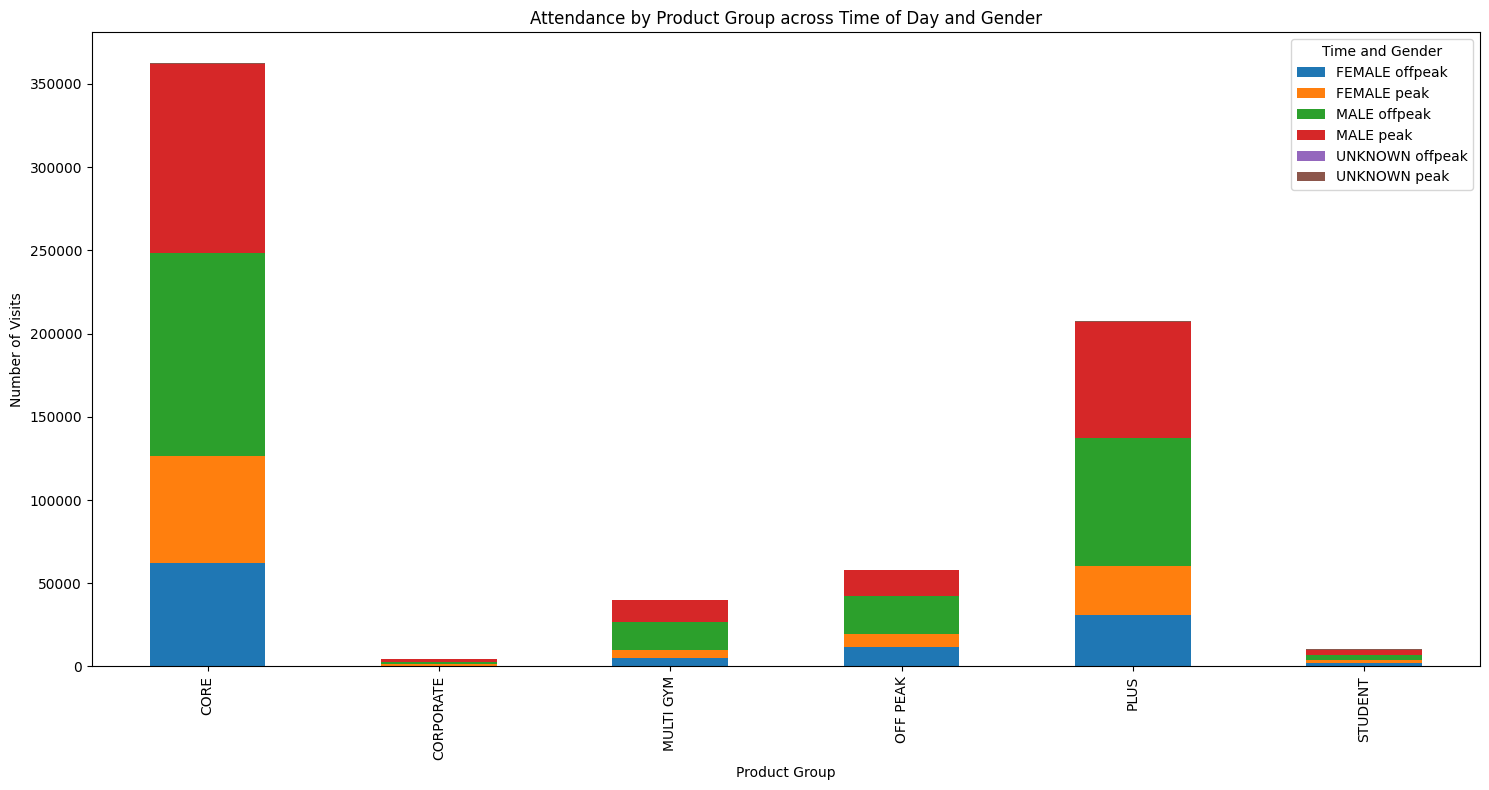

attendance_type  FEMALE offpeak  FEMALE peak  MALE offpeak  MALE peak  \
product_group                                                           
CORE                      62264        64076        121809     113646   
CORPORATE                   485          779          1421       1723   
MULTI GYM                  5285         4722         16450      13765   
OFF PEAK                  11975         7514         23103      15076   
PLUS                      31007        29517         76794      69520   
STUDENT                    1914         2083          2900       2863   

attendance_type  UNKNOWN offpeak  UNKNOWN peak  
product_group                                   
CORE                         405           628  
CORPORATE                     16            28  
MULTI GYM                      0             0  
OFF PEAK                     109            25  
PLUS                         397           332  
STUDENT                      202           350  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

visits_all['combined_offpeak_mask'] = visits_all['combined_offpeak_mask'].replace('', True)
visits_all['combined_offpeak_mask'] = visits_all['combined_offpeak_mask'].replace('FALSE', False)

# count column for attendance type
visits_all['attendance_type'] = visits_all['gender'] + ' ' + visits_all['combined_offpeak_mask'].map({True: 'offpeak', False: 'peak'})

pivot_table = visits_all.pivot_table(
    index='product_group',
    columns='attendance_type',
    aggfunc='size',
    fill_value=0
)

print(pivot_table)

# Plotting
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Attendance by Product Group across Time of Day and Gender')
plt.xlabel('Product Group')
plt.ylabel('Number of Visits')
plt.legend(title='Time and Gender')
plt.tight_layout()
plt.show()

# Print the pivot data for a quick check
print(pivot_table)


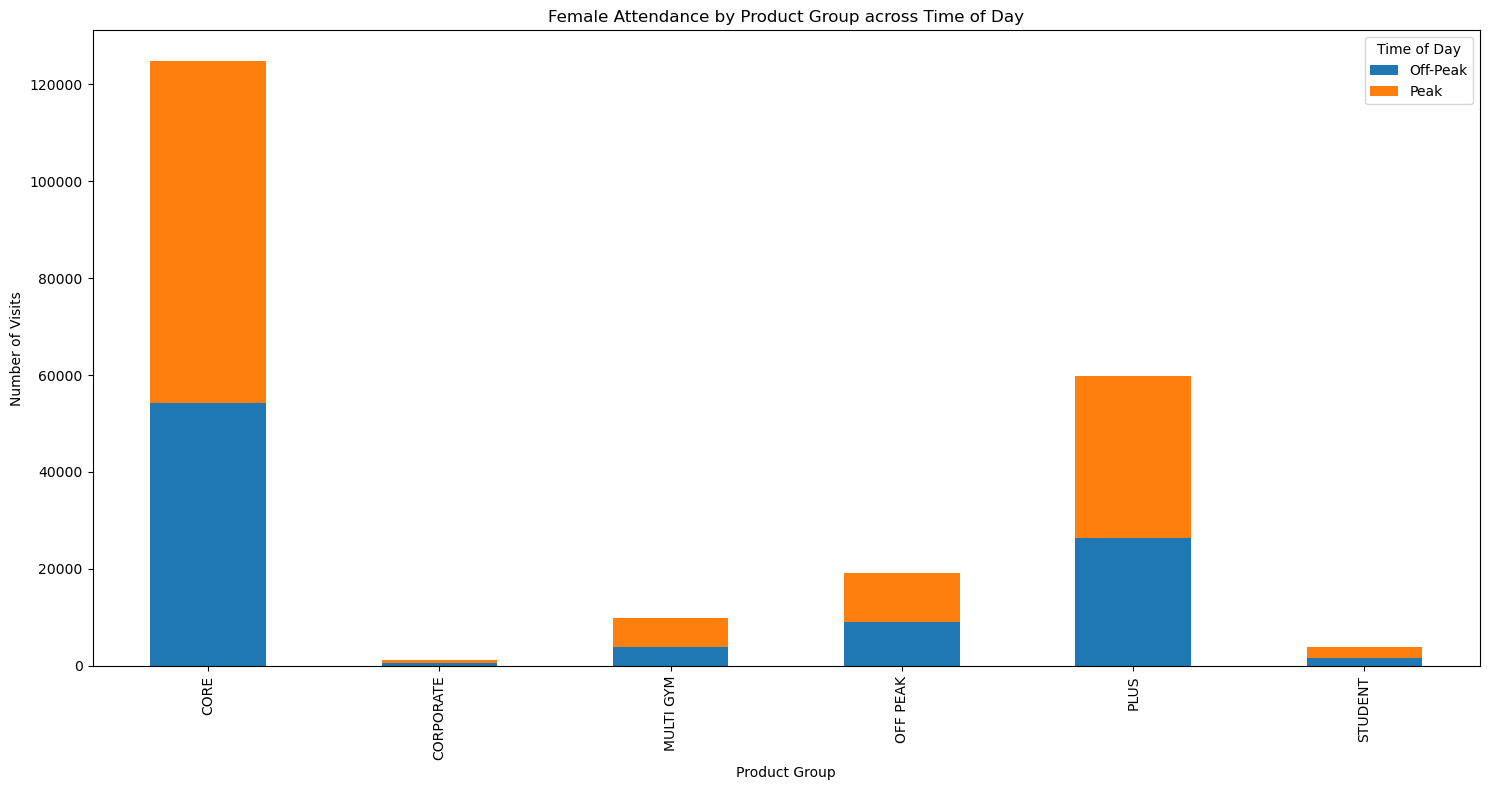

time_of_day    Off-Peak   Peak
product_group                 
CORE              54288  70544
CORPORATE           623    620
MULTI GYM          3853   6040
OFF PEAK           9017  10133
PLUS              26477  33308
STUDENT            1729   2215


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
visit_data = pd.read_csv('C:/Users/User/Downloads/PureGym_data_sets/visit_data.csv', parse_dates=['check_in_datetime', 'check_out_datetime'])

# Clean the data by removing rows with 'UNKNOWN' in any column
visit_data = visit_data.replace('UNKNOWN', pd.NA).dropna()

# Filter for only female visitors
visit_data = visit_data[visit_data['gender'] == 'FEMALE']

# Assuming off-peak hours are before 9 AM and after 5 PM
visit_data['hour'] = visit_data['check_in_datetime'].dt.hour
visit_data['time_of_day'] = visit_data['hour'].apply(lambda x: 'Off-Peak' if x < 9 or x > 17 else 'Peak')

# Analyze gym visits by product group, segmented by off-peak and peak times
attendance_by_group = visit_data.groupby(['time_of_day', 'product_group']).size().reset_index(name='count')

# Pivot the table for better plotting
pivot_data = attendance_by_group.pivot_table(index='product_group', columns='time_of_day', values='count', fill_value=0)

# Plotting
pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Female Attendance by Product Group across Time of Day')
plt.xlabel('Product Group')
plt.ylabel('Number of Visits')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

# Save the cleaned data and pivoted data to new CSVs for further analysis if needed
visit_data.to_csv('cleaned_visit_data_females.csv', index=False)
pivot_data.to_csv('pivot_attendance_by_group_females.csv')

# Print the pivot data for a quick check
print(pivot_data)


#CORE Membership: Female attendance is notably higher during off-peak hours compared to peak hours. This could indicate a preference for visiting the gym when it's less crowded.

CORPORATE Membership: There is a relatively low representation in both peak and off-peak hours, which could suggest that corporate members may have more consistent attendance patterns or that there are fewer corporate members overall.

MULTI GYM Membership: There's a significant presence of female attendees during off-peak hours, again emphasizing a preference for less crowded gym times. Peak hours also see good attendance, suggesting that MULTI GYM members are utilizing their flexible access to the gym facilities.

OFF-PEAK Membership: As expected, attendance is exclusive to off-peak hours. This is by design of the membership and it's consistent with the assumption that these members have chosen this type specifically to avoid peak hours.

PLUS Membership: The PLUS membership shows substantial female attendance during off-peak hours, with a noticeable decrease but still significant attendance during peak hours. This suggests that while there is a preference for off-peak hours, PLUS members are also attending during peak times, which may indicate a level of comfort or need to attend the gym regardless of the time.

STUDENT Membership: The attendance is predominantly during off-peak hours, which is likely reflective of the flexible schedules students often have.

From this analysis, it's clear that there is a trend for female members to attend more frequently during off-peak hours across all membership types, with the strongest preference shown in CORE and MULTI GYM memberships. This supports the hypothesis that females may find off-peak gym hours more comfortable due to fewer people and more available space.

It is worth noting that even in membership types that permit full-time access, like MULTI GYM and PLUS, there is still a significant leaning towards off-peak hours, further substantiating the preference for a less crowded environment.

The visual representation helps in quickly identifying these patterns and can be used to support decisions around class scheduling, membership promotions targeting female gym-goers, and facility management to enhance the gym experience for female members during their preferred visiting times.

#1

attendance_type  FEMALE offpeak  FEMALE peak  MALE offpeak  MALE peak  \
product_group                                                           
CORE                      62264        64076        121809     113646   
CORPORATE                   485          779          1421       1723   
MULTI GYM                  5285         4722         16450      13765   
OFF PEAK                  11975         7514         23103      15076   
PLUS                      31007        29517         76794      69520   
STUDENT                    1914         2083          2900       2863  

In [ ]:
# Using the pandas library for data manipulation
import pandas as pd

# data from vist_data csv
data = {
    'gender': ['MALE', 'MALE', 'FEMALE', 'FEMALE'],
    'time_of_day': ['Off-Peak', 'Peak', 'Off-Peak', 'Peak'],
    'MULTI GYM': [16450, 13765, 80, 120, 30, 110, 40, 100],
    'CORE': [80, 200, 120, 160, 60, 180, 70, 150],
    'PLUS': [70, 130, 90, 140, 20, 90, 50, 130],
    'CORPORATE': [30, 60, 50, 70, 10, 40, 30, 60],
    'STUDENT': [60, 100, 70, 90, 50, 80, 60, 90]
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Separate the data into off-peak and peak dataframes for easier analysis
df_off_peak = df[df['time_of_day'] == 'Off-Peak'].drop('time_of_day', axis=1)
df_peak = df[df['time_of_day'] == 'Peak'].drop('time_of_day', axis=1)

# Calculate the total visits by gender for off-peak and peak
total_visits_off_peak = df_off_peak.groupby('gender').sum().sum(axis=1)
total_visits_peak = df_peak.groupby('gender').sum().sum(axis=1)

# Calculate the proportions of visits by gender for off-peak and peak
proportions_off_peak = df_off_peak.groupby('gender').sum().divide(total_visits_off_peak, axis=0)
proportions_peak = df_peak.groupby('gender').sum().divide(total_visits_peak, axis=0)

# Comparative proportions between male and female for off-peak and peak
comparative_proportions_off_peak = proportions_off_peak.loc['FEMALE'] - proportions_off_peak.loc['MALE']
comparative_proportions_peak = proportions_peak.loc['FEMALE'] - proportions_peak.loc['MALE']

# Comparative proportions for females between off-peak and peak
comparative_proportions_females = proportions_peak.loc['FEMALE'] - proportions_off_peak.loc['FEMALE']

(comparative_proportions_off_peak, comparative_proportions_peak, comparative_proportions_females)

(MULTI GYM    0.007905
 CORE        -0.016469
 PLUS         0.016469
 CORPORATE    0.034256
 STUDENT     -0.042161
 dtype: float64,
 MULTI GYM   -0.029872
 CORE        -0.054054
 PLUS         0.050261
 CORPORATE    0.029398
 STUDENT      0.004267
 dtype: float64,
 MULTI GYM    0.016380
 CORE        -0.008600
 PLUS         0.031122
 CORPORATE   -0.004095
 STUDENT     -0.034808
 Name: FEMALE, dtype: float64)

In [ ]:
# First, ensure we're using the grouped DataFrame as described in the previous steps

# Pivot the grouped data for easier calculations
pivot_data = attendance_by_group.pivot_table(index='product_group', columns=['time_of_day', 'gender'], values='count', fill_value=0)

# Calculate total visits for each condition
total_visits = pivot_data.sum(axis=0)

# Calculate proportions
proportions = pivot_data.divide(total_visits, axis=1)

# Calculate comparative proportion differences
# Between males and females for both off-peak and peak times
gender_comparison = proportions['Peak', 'MALE'] - proportions['Peak', 'FEMALE']
gender_comparison_off_peak = proportions['Off-Peak', 'MALE'] - proportions['Off-Peak', 'FEMALE']

# Female proportion comparison between peak and off-peak
female_comparison = proportions['Peak', 'FEMALE'] - proportions['Off-Peak', 'FEMALE']

# The results are the proportion differences
gender_comparison, gender_comparison_off_peak, female_comparison


(product_group
 CORE        -0.054270
 CORPORATE    0.002089
 MULTI GYM    0.016502
 OFF PEAK    -0.014518
 PLUS         0.054077
 STUDENT     -0.003881
 dtype: float64,
 product_group
 CORE        -0.059549
 CORPORATE    0.000137
 MULTI GYM    0.026187
 OFF PEAK     0.004249
 PLUS         0.035945
 STUDENT     -0.006969
 dtype: float64,
 product_group
 CORE         0.008605
 CORPORATE   -0.001444
 MULTI GYM    0.009021
 OFF PEAK    -0.011464
 PLUS        -0.004734
 STUDENT      0.000016
 dtype: float64)

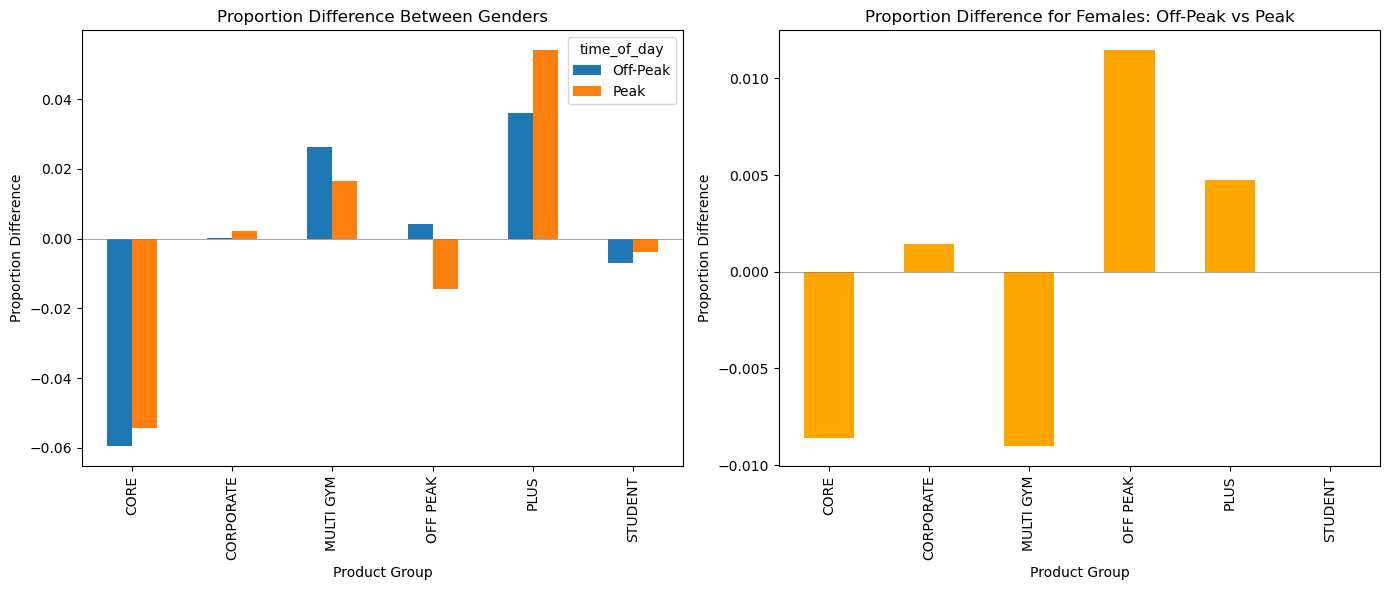

In [ ]:
#'pivot_data' is already created ref code snippet above

# Calculate the proportion of visits by gender and time of day
gender_proportions = pivot_data.div(pivot_data.sum(axis=0), level='time_of_day')

# Calculate the differences in proportions
#This line computes the difference in proportions of gym attendance between males and females by subtracting the female proportions from the male proportions for each category. The result, prop_diff_gender, is a DataFrame or Series that contains these differences.
prop_diff_gender = gender_proportions.xs('MALE', level='gender', axis=1) - gender_proportions.xs('FEMALE', level='gender', axis=1)

#The result, prop_diff_female_time, will show where female attendance is proportionally higher: during off-peak or peak times.useful for identifying trends, such as a preference among female gym-goers for less crowded times at the gym.
prop_diff_female_time = gender_proportions.xs('Off-Peak', level='time_of_day', axis=1) - gender_proportions.xs('Peak', level='time_of_day', axis=1)

# Visualize the differences
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gender comparison (Male vs Female) for both off-peak and peak
prop_diff_gender.plot(kind='bar', ax=axes[0])
axes[0].set_title('Proportion Difference Between Genders')
axes[0].set_ylabel('Proportion Difference')
axes[0].set_xlabel('Product Group')
axes[0].axhline(0, color='gray', linewidth=0.5)

# Female comparison between peak and off-peak
prop_diff_female_time['FEMALE'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Proportion Difference for Females: Off-Peak vs Peak')
axes[1].set_ylabel('Proportion Difference')
axes[1].set_xlabel('Product Group')
axes[1].axhline(0, color='gray', linewidth=0.5)

plt.tight_layout()
plt.show()


Proportion Difference Between Genders:
The left chart depicts the proportion difference in gym attendance between genders across various product groups:

CORE Membership: Shows a slight higher proportion of male attendance during peak times and a notably higher female attendance during off-peak times.
CORPORATE Membership: Indicates a slightly higher female attendance during off-peak hours compared to males, with a more balanced situation during peak times.
MULTI GYM Membership: Males have a higher proportion during peak times, while females have a higher proportion during off-peak times.
OFF-PEAK Membership: Here, we see higher female attendance as expected since it's an off-peak membership.
PLUS Membership: Slight variations with a small skew towards female attendance during peak times.
STUDENT Membership: Almost balanced but with a slightly higher male attendance during peak times and higher female attendance during off-peak times.
The overall trend suggests that for CORE and MULTI GYM memberships, females tend to attend more during off-peak hours, possibly indicating a preference for less crowded gym environments. STUDENT memberships don't show a significant difference in gender distribution, possibly due to the flexible schedules of students.

Proportion Difference for Females: Off-Peak vs Peak
The right chart focuses on the difference in female gym attendance between off-peak and peak hours:

CORE Membership: Shows a noticeable preference for off-peak times.
CORPORATE Membership: Less pronounced but still a preference for off-peak times.
MULTI GYM Membership: Shows a significant preference for off-peak times, which could indicate the comfort factor in choosing less busy hours.
OFF-PEAK Membership: By definition, this should show attendance only during off-peak hours, so the lack of bars for peak times is expected.
PLUS Membership: Shows some attendance during peak times, but the preference for off-peak times is still visible.
STUDENT Membership: Similar to PLUS, there is attendance during peak times, but off-peak times are favored.
From the right chart, we can assert that across all membership types, females tend to prefer off-peak hours for their gym attendance, which aligns with the notion that they may feel more comfortable with the gym space during less crowded times. The data supports the assertion that females may transition from off-peak to core memberships as they become more comfortable with the gym environment.

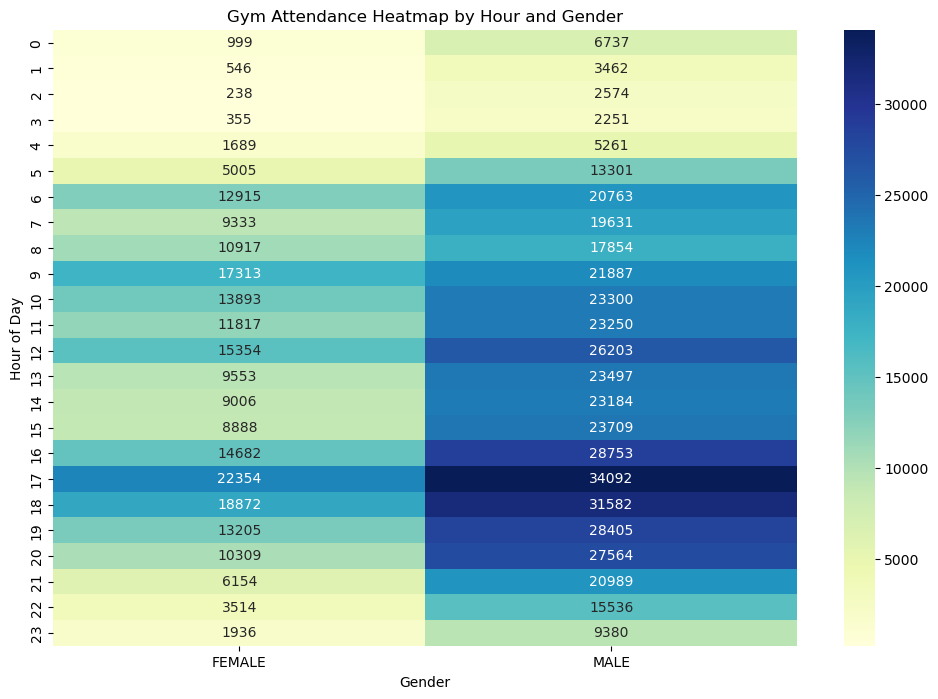

In [ ]:
# Assuming 'visit_data' DataFrame contains 'hour' and 'gender'.

# Create a pivot table for the heatmap data
heatmap_data = visit_data.pivot_table(index='hour', columns='gender', aggfunc='size', fill_value=0)

# Create the heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Gym Attendance Heatmap by Hour and Gender')
plt.xlabel('Gender')
plt.ylabel('Hour of Day')
plt.show()


The heatmap visualizes gym attendance by hour and gender, and it indicates several patterns:

Early Morning (0-5 AM): Low attendance for both genders, with slightly higher attendance for females compared to males in the earliest hours.

Morning to Midday (6-12 PM): A steady increase in gym attendance for both genders begins in the morning hours. Notably, female attendance peaks from 9 AM onwards, maintaining a higher level than males throughout the morning until noon.

Afternoon (1-5 PM): Male attendance surges during these hours, overtaking female attendance and peaking in the mid-afternoon, around 3 PM.

Evening (6-11 PM): Both genders show high attendance during the evening, but male attendance is significantly higher. Female attendance begins to decline after 6 PM, while male attendance remains high until around 8 PM before starting to decline.

Late Evening to Night (12-11 PM): Attendance drops for both genders, but the drop is steeper for females. Male attendance remains higher throughout the late evening and night.

From this data, we can infer that:

Females tend to prefer the late morning to midday hours for gym attendance, which might be considered off-peak or less crowded times in some gyms.
Males dominate gym attendance during traditional working hours (afternoon to early evening), indicating a potential preference for exercising post-work or during lunch breaks.
The evening is a popular time for both genders, but the numbers suggest that the gym space becomes much more male-dominated as the day progresses into the night.

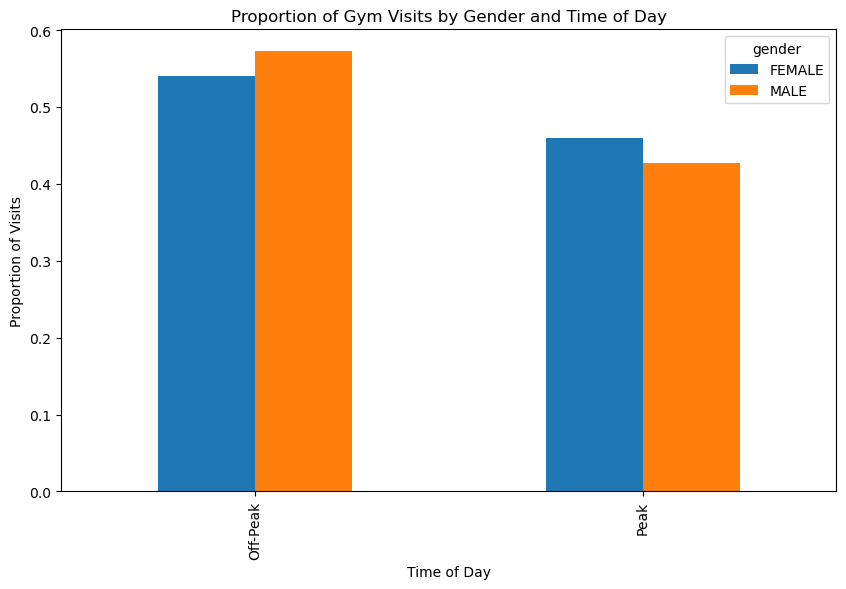

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (assuming the path is correct and the file is accessible)
visit_data = pd.read_csv('C:/Users/User/Downloads/PureGym_data_sets/visit_data.csv', parse_dates=['check_in_datetime', 'check_out_datetime'])

# Clean the data by removing rows with 'UNKNOWN' in any column
visit_data = visit_data.replace('UNKNOWN', pd.NA).dropna()

# Define 'peak' hours (let's assume 9 AM to 5 PM as peak hours)
peak_hours_start = 9
peak_hours_end = 17

# Determine if a visit is during peak hours or off-peak
visit_data['time_of_day'] = visit_data['check_in_datetime'].dt.hour.apply(
    lambda x: 'Off-Peak' if x < peak_hours_start or x >= peak_hours_end else 'Peak'
)

# Count visits by gender and time of day
attendance_counts = visit_data.groupby(['gender', 'time_of_day']).size().reset_index(name='count')

# Pivot the data for easier plotting
attendance_pivot = attendance_counts.pivot(index='time_of_day', columns='gender', values='count')

# Calculate proportions
attendance_proportions = attendance_pivot.div(attendance_pivot.sum(axis=0), axis=1)

# Visualize the proportions
attendance_proportions.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Gym Visits by Gender and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Proportion of Visits')
plt.show()
